In [1]:
import mne
import json
import scipy.stats
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
montage = mne.channels.read_dig_fif('montage.fif')
montage.ch_names = json.load(open("montage_ch_names.json"))
montage.dig = montage.dig[:64]
montage.ch_names = montage.ch_names[:64]
for i in range(len(montage.dig)):
    montage.dig[i]['r'] = np.array([item * 1e-6 for item in montage.dig[i]['r']])
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
for dig_info_ in ten_twenty_montage.dig:
    dig_info = copy.deepcopy(dig_info_)
    if 'EEG' not in str(dig_info['kind']):
        montage.dig.insert(0, dig_info)

In [3]:
picked_channels = ["FP1", "FPZ", "FP2", "AF3", "AF4", "F7", "F5", "F3", "F1", "FZ", "F2", "F4", "F6", "F8", "FT7", "FC5", "FC3", "FC1", "FCZ", "FC2", "FC4", "FC6", "FT8", "T7", "C5", "C3", "C1", "CZ", "C2", "C4", "C6", "T8", "TP7", "CP5", "CP3", "CP1", "CPZ", "CP2", "CP4", "CP6", "TP8", "P7", "P5", "P3", "P1", "PZ", "P2", "P4", "P6", "P8", "PO7", "PO5", "PO3", "POZ", "PO4", "PO6", "PO8", "O1", "OZ", "O2"]
total_channels = ["FP1", "FPZ", "FP2", "AF3", "AF4", "F7", "F5", "F3", "F1", "FZ", "F2", "F4", "F6", "F8", "FT7", "FC5", "FC3", "FC1", "FCZ", "FC2", "FC4", "FC6", "FT8", "T7", "C5", "C3", "C1", "CZ", "C2", "C4", "C6", "T8", "TP7", "CP5", "CP3", "CP1", "CPZ", "CP2", "CP4", "CP6", "TP8", "P7", "P5", "P3", "P1", "PZ", "P2", "P4", "P6", "P8", "PO7", "PO5", "PO3", "POZ", "PO4", "PO6", "PO8", "CB1", "O1", "OZ", "O2", "CB2", ]
fake_info = mne.create_info(ch_names=total_channels, sfreq=1000., ch_types='eeg')

select_index = [idx for idx in range(len(total_channels)) if total_channels[idx] in picked_channels]

In [127]:
np.array(idx2de['0']).shape[0]

10

In [128]:
for idx, features in idx2de.items():
    print(idx)
    print(features)

0
[[[-10.888090975401223, -12.73395457684938, -13.748206124207512, -14.42422278536989, -14.889000045615672], [-10.893574996300444, -12.738384320702838, -13.753411896898177, -14.428112631500946, -14.90158643525057], [-10.89072079773229, -12.732267029114094, -13.747618294540068, -14.421639586585792, -14.897058963397392], [-11.908865217777677, -13.75454936157259, -14.76904022225831, -15.44636500105865, -15.919536251893668], [-11.86881782785696, -13.711821552091925, -14.727120264838733, -15.395300816138693, -15.876137089920904], [-12.863670878147614, -14.713022808798815, -15.72174652920395, -16.384407079262978, -16.863037448877442], [-12.97095920315383, -14.82001349368935, -15.834236914347793, -16.50923922064298, -16.982256210551313], [-13.208219312184662, -15.055551539315692, -16.068768708489237, -16.747345771252544, -17.220774640526642], [-13.242148836763562, -15.090140580060734, -16.10176901584524, -16.777748401790387, -17.2547381901078], [-13.200452242142857, -15.046331953253365, -16.0

In [96]:
np.array(s1).shape

(20, 62, 5)

In [129]:
v2info['LAB2-牛顿-负面']

{'video_type': 1,
 'start_time': 1702729424745,
 'end_time': 1702729458383,
 'tend': 1,
 'eeg_start_time': 42373,
 'eeg_end_time': 76371,
 'idx': 0}

In [4]:
data_LAB1 = {
    'subject':[],
    'positive_env':[],
    'negative_env':[],
    'SEED_video':[],
    'neutral':[],
    'fear':[],
    'sad':[],
    'happy':[]
}
#修改输入的被试情况
for date in ['LAB1-huqifan','LAB1-cangyueyang','LAB1-hongyurui','LAB1-fanhao','LAB1-dongyimeng','LAB1-houlinzhi','LAB1-jiwenjun','LAB1-lujianing','LAB1-miaoshengze',
             'LAB1-wanfangwei','LAB1-wangxiaoting','LAB1-wangzhengni','LAB1-yangchen','LAB1-zhangxue','LAB1-liangqihang','LAB1-daisiwei',
             'LAB1-zhangyutong','LAB1-mengfanjie','LAB1-zhangchenxi','LAB1-liangyanshu','LAB1-zhaochensong','LAB1-chenrong','LAB1-chenxingyu']:
    v2info = json.load(open('./v2info/'+date+'_v2info.json'))
    idx2de = json.load(open('./hope_features/'+date+'_idx2de.json'))
    for v in v2info.keys():
        if 'idx' not in v2info[v].keys():
            continue
        if v2info[v]['tend'] == 0:
            data_LAB1['positive_env'] += idx2de[str(v2info[v]['idx'])]
            data_LAB1['subject'] += idx2de[str(v2info[v]['idx'])]
        elif v2info[v]['tend'] == 1:
            data_LAB1['negative_env'] += idx2de[str(v2info[v]['idx'])]
            data_LAB1['subject'] += idx2de[str(v2info[v]['idx'])]
        elif v2info[v]['tend'] == 2:
            data_LAB1['SEED_video'] += idx2de[str(v2info[v]['idx'])]
            if(v2info[v]['video_type'] == 2):
                data_LAB1['neutral'] += idx2de[str(v2info[v]['idx'])]
            elif(v2info[v]['video_type'] == 3):
                data_LAB1['sad'] += idx2de[str(v2info[v]['idx'])]
            elif(v2info[v]['video_type'] == 4):
                data_LAB1['fear'] += idx2de[str(v2info[v]['idx'])]
            elif(v2info[v]['video_type'] == 5):
                data_LAB1['happy'] += idx2de[str(v2info[v]['idx'])]

In [105]:
np.array(idx2de['5']).shape

(10, 62, 5)

In [5]:
data_LAB2 = {
    'subject':[],
    'positive_env':[],
    'negative_env':[],
    'SEED_video':[],
    'neutral':[],
    'fear':[],
    'sad':[],
    'happy':[]
}

# 修改输入的被试情况
for date in ['LAB2-huqifan','LAB2-cangyueyang','LAB2-hongyurui','LAB2-fanhao','LAB2-dongyimeng','LAB2-houlinzhi','LAB2-jiwenjun','LAB2-lujianing','LAB2-miaoshengze',
             'LAB2-wanfangwei','LAB2-wangxiaoting','LAB2-wangzhengni','LAB2-yangchen','LAB2-zhangxue','LAB2-liangqihang','LAB2-daisiwei',
             'LAB2-zhangyutong','LAB2-mengfanjie','LAB2-zhangchenxi','LAB2-liangyanshu','LAB2-zhaochensong','LAB2-chenrong','LAB2-chenxingyu']:
    v2info = json.load(open('./v2info/'+date+'_v2info.json'))
    idx2de = json.load(open('./hope_features/'+date+'_idx2de.json'))
    for v in v2info.keys():
        if 'idx' not in v2info[v].keys():
            continue
        if v2info[v]['tend'] == 0:
            print(np.array(idx2de[str(v2info[v]['idx'])]).shape)
            data_LAB2['positive_env'] += idx2de[str(v2info[v]['idx'])]
            data_LAB2['subject'] += idx2de[str(v2info[v]['idx'])]
        elif v2info[v]['tend'] == 1:
            data_LAB2['negative_env'] += idx2de[str(v2info[v]['idx'])]
            data_LAB2['subject'] += idx2de[str(v2info[v]['idx'])]
        elif v2info[v]['tend'] == 2:
            data_LAB2['SEED_video'] += idx2de[str(v2info[v]['idx'])]
            if(v2info[v]['video_type'] == 2):
                data_LAB2['neutral'] += idx2de[str(v2info[v]['idx'])]
            elif(v2info[v]['video_type'] == 3):
                data_LAB2['sad'] += idx2de[str(v2info[v]['idx'])]
            elif(v2info[v]['video_type'] == 4):
                data_LAB2['fear'] += idx2de[str(v2info[v]['idx'])]
            elif(v2info[v]['video_type'] == 5):
                data_LAB2['happy'] += idx2de[str(v2info[v]['idx'])]


(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(1, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(28, 62, 5)
(10, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(11, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 62, 5)
(30, 

In [6]:
data_LAB1 = {
    'subject':[],
    'positive_env':[],
    'negative_env':[],
    'SEED_video':[],
    'neutral':[],
    'fear':[],
    'sad':[],
    'happy':[]
}

# 修改输入的被试情况
for date in ['LAB1-huqifan','LAB1-cangyueyang','LAB1-hongyurui','LAB1-fanhao','LAB1-dongyimeng','LAB1-houlinzhi','LAB1-jiwenjun','LAB1-lujianing','LAB1-miaoshengze',
             'LAB1-wanfangwei','LAB1-wangxiaoting','LAB1-wangzhengni','LAB1-yangchen','LAB1-zhangxue','LAB1-liangqihang','LAB1-daisiwei',
             'LAB1-zhangyutong','LAB1-mengfanjie','LAB1-zhangchenxi','LAB1-liangyanshu','LAB1-zhaochensong','LAB1-chenrong','LAB1-chenxingyu']:
    v2info = json.load(open('./v2info/'+date+'_v2info.json'))
    idx2de = json.load(open('./hope_features/'+date+'_idx2de.json'))
    for v in v2info.keys():
        if 'idx' not in v2info[v].keys():
            continue
        features = np.array(idx2de[str(v2info[v]['idx'])])
    
    # 仅当形状为 (30, 62, 5) 时添加数据
        if features.shape == (30, 62, 5):
        #if(1):
            # 对于 (30, 62, 5) 形状的数据，按第一个轴取平均
            averaged_features = features.mean(axis=0)
            data_to_add = averaged_features.tolist()  # 转换为列表
    
            # 根据 tend 和 video_type 条件添加到相应的列表
            if v2info[v]['tend'] == 0:
                data_LAB1['positive_env'].append(data_to_add)
                data_LAB1['subject'].append(data_to_add)
            elif v2info[v]['tend'] == 1:
                data_LAB1['negative_env'].append(data_to_add)
                data_LAB1['subject'].append(data_to_add)
            elif v2info[v]['tend'] == 2:
                data_LAB1['SEED_video'].append(data_to_add)
                if v2info[v]['video_type'] == 2:
                    data_LAB1['neutral'].append(data_to_add)
                elif v2info[v]['video_type'] == 3:
                    data_LAB1['sad'].append(data_to_add)
                elif v2info[v]['video_type'] == 4:
                    data_LAB1['fear'].append(data_to_add)
                elif v2info[v]['video_type'] == 5:
                    data_LAB1['happy'].append(data_to_add)

In [7]:
data_LAB2 = {
    'subject':[],
    'positive_env':[],
    'negative_env':[],
    'SEED_video':[],
    'neutral':[],
    'fear':[],
    'sad':[],
    'happy':[]
}

# 修改输入的被试情况
for date in ['LAB2-huqifan','LAB2-cangyueyang','LAB2-hongyurui','LAB2-fanhao','LAB2-dongyimeng','LAB2-houlinzhi','LAB2-jiwenjun','LAB2-lujianing','LAB2-miaoshengze',
             'LAB2-wanfangwei','LAB2-wangxiaoting','LAB2-wangzhengni','LAB2-yangchen','LAB2-zhangxue','LAB2-liangqihang','LAB2-daisiwei',
             'LAB2-zhangyutong','LAB2-mengfanjie','LAB2-zhangchenxi','LAB2-liangyanshu','LAB2-zhaochensong','LAB2-chenrong','LAB2-chenxingyu']:
    v2info = json.load(open('./v2info/'+date+'_v2info.json'))
    idx2de = json.load(open('./hope_features/'+date+'_idx2de.json'))
    for v in v2info.keys():
        if 'idx' not in v2info[v].keys():
            continue
        features = np.array(idx2de[str(v2info[v]['idx'])])
    
    # 仅当形状为 (30, 62, 5) 时添加数据
        if features.shape == (30, 62, 5):
        #if(1):
            # 对于 (30, 62, 5) 形状的数据，按第一个轴取平均
            averaged_features = features.mean(axis=0)
            data_to_add = averaged_features.tolist()  # 转换为列表
    
            # 根据 tend 和 video_type 条件添加到相应的列表
            if v2info[v]['tend'] == 0 and v2info[v]['video_type']==0:
                data_LAB2['positive_env'].append(data_to_add)
                data_LAB2['subject'].append(data_to_add)
            elif v2info[v]['tend'] == 1 and v2info[v]['video_type']==0:
                data_LAB2['negative_env'].append(data_to_add)
                data_LAB2['subject'].append(data_to_add)
            elif v2info[v]['tend'] == 2:
                data_LAB2['SEED_video'].append(data_to_add)
                if v2info[v]['video_type'] == 2:
                    data_LAB2['neutral'].append(data_to_add)
                elif v2info[v]['video_type'] == 3:
                    data_LAB2['sad'].append(data_to_add)
                elif v2info[v]['video_type'] == 4:
                    data_LAB2['fear'].append(data_to_add)
                elif v2info[v]['video_type'] == 5:
                    data_LAB2['happy'].append(data_to_add)

In [8]:
data_LAB1 = {
    'subject':[],
    'positive_env':[],
    'negative_env':[],
    'SEED_video':[],
    'neutral':[],
    'fear':[],
    'sad':[],
    'happy':[]
}

def add_features(data_list, features):
    # 将（3，62，5）特征数组添加到列表中
    for feature in features:
        data_list.append(feature)

for date in ['LAB1-huqifan', 'LAB1-cangyueyang', 'LAB1-hongyurui', 'LAB1-fanhao', 'LAB1-dongyimeng', 'LAB1-houlinzhi', 'LAB1-jiwenjun', 'LAB1-lujianing', 'LAB1-miaoshengze',
             'LAB1-wanfangwei', 'LAB1-wangxiaoting', 'LAB1-wangzhengni', 'LAB1-yangchen', 'LAB1-zhangxue', 'LAB1-liangqihang', 'LAB1-daisiwei',
             'LAB1-zhangyutong', 'LAB1-mengfanjie', 'LAB1-zhangchenxi', 'LAB1-liangyanshu', 'LAB1-zhaochensong', 'LAB1-chenrong', 'LAB1-chenxingyu']:
    v2info = json.load(open('./v2info/' + date + '_v2info.json'))
    idx2de = json.load(open('./hope_features/' + date + '_idx2de.json'))
    for v in v2info.keys():
        if 'idx' not in v2info[v].keys():
            continue
        features = np.array(idx2de[str(v2info[v]['idx'])])
    
        if features.shape == (30, 62, 5):
            # 将30个特征分成3组，每组10个特征
            grouped_features = features.reshape(3, 10, 62, 5).mean(axis=1)
    
            # 根据 tend 和 video_type 条件添加到相应的列表
            if v2info[v]['tend'] == 0:
                add_features(data_LAB1['positive_env'], grouped_features)
                add_features(data_LAB1['subject'], grouped_features)
            elif v2info[v]['tend'] == 1:
                add_features(data_LAB1['negative_env'], grouped_features)
                add_features(data_LAB1['subject'], grouped_features)
            elif v2info[v]['tend'] == 2:
                add_features(data_LAB1['SEED_video'], grouped_features)
                if v2info[v]['video_type'] == 2:
                    add_features(data_LAB1['neutral'], grouped_features)
                elif v2info[v]['video_type'] == 3:
                    add_features(data_LAB1['sad'], grouped_features)
                elif v2info[v]['video_type'] == 4:
                    add_features(data_LAB1['fear'], grouped_features)
                elif v2info[v]['video_type'] == 5:
                    add_features(data_LAB1['happy'], grouped_features)

# 转换列表为numpy数组
for key in data_LAB1.keys():
    data_LAB1[key] = np.array(data_LAB1[key])

In [9]:
data_LAB2 = {
    'subject':[],
    'positive_env':[],
    'negative_env':[],
    'SEED_video':[],
    'neutral':[],
    'fear':[],
    'sad':[],
    'happy':[],
    'po_env_po_video':[],
    'po_env_ne_video':[],
    'ne_env_po_video':[],
    'ne_env_ne_video':[],
    'po_env_high_va':[],
    'po_env_low_va':[],
    'ne_env_high_va':[],
    'ne_env_low_va':[],
    'po_env_high_ro':[],
    'po_env_low_ro':[],
    'ne_env_high_ro':[],
    'ne_env_low_ro':[],
    'po_env_with_like':[],
    'po_env_without_like':[],
    'ne_env_with_like':[],
    'ne_env_without_like':[],
    'po_env_high_time':[],
    'po_env_low_time':[],
    'ne_env_high_time':[],
    'ne_env_low_time':[]
}

def add_features(data_list, features):
    # 将（3，62，5）特征数组添加到列表中
    for feature in features:
        data_list.append(feature)

for date in ['LAB2-huqifan', 'LAB2-cangyueyang', 'LAB2-hongyurui', 'LAB2-fanhao', 'LAB2-dongyimeng', 'LAB2-houlinzhi', 'LAB2-jiwenjun', 'LAB2-lujianing', 'LAB2-miaoshengze',
             'LAB2-wanfangwei', 'LAB2-wangxiaoting', 'LAB2-wangzhengni', 'LAB2-yangchen', 'LAB2-zhangxue', 'LAB2-liangqihang', 'LAB2-daisiwei',
             'LAB2-zhangyutong', 'LAB2-mengfanjie', 'LAB2-zhangchenxi', 'LAB2-liangyanshu', 'LAB2-zhaochensong', 'LAB2-chenrong', 'LAB2-chenxingyu']:
    v2info = json.load(open('./v2info/' + date + '_v2info.json'))
    idx2de = json.load(open('./hope_features/' + date + '_idx2de.json'))
    for v in v2info.keys():
        if 'idx' not in v2info[v].keys():
            continue
        features = np.array(idx2de[str(v2info[v]['idx'])])
    
        if features.shape == (30, 62, 5):
            # 将30个特征分成3组，每组10个特征
            grouped_features = features.reshape(1, 30, 62, 5).mean(axis=1)
            #grouped_features = features.mean(axis=0)
    
            # 根据 tend 和 video_type 条件添加到相应的列表
            if v2info[v]['tend'] == 0:
                add_features(data_LAB2['positive_env'], grouped_features)
                add_features(data_LAB2['subject'], grouped_features)
                if v2info[v]['video_type'] == 0:
                    add_features(data_LAB2['po_env_po_video'], grouped_features)
                if v2info[v]['video_type'] == 1:
                    add_features(data_LAB2['po_env_ne_video'], grouped_features)
                if v2info[v]['valence']>5:
                    add_features(data_LAB2['po_env_high_va'], grouped_features)
                if v2info[v]['valence']<5:
                    add_features(data_LAB2['po_env_low_va'], grouped_features)
                if v2info[v]['arousal']>5:
                    add_features(data_LAB2['po_env_high_ro'], grouped_features)
                if v2info[v]['arousal']<5:
                    add_features(data_LAB2['po_env_low_ro'], grouped_features)
                if v2info[v]['like'] == 1:
                    add_features(data_LAB2['po_env_with_like'], grouped_features)
                if v2info[v]['like'] == 0:
                    add_features(data_LAB2['po_env_without_like'], grouped_features)
                if v2info[v]['play_duration'] >0.9:
                    add_features(data_LAB2['po_env_high_time'], grouped_features)
                if v2info[v]['play_duration'] <0.9:
                    add_features(data_LAB2['po_env_low_time'], grouped_features)
            elif v2info[v]['tend'] == 1:
                add_features(data_LAB2['negative_env'], grouped_features)
                add_features(data_LAB2['subject'], grouped_features)
                if v2info[v]['video_type'] == 0:
                    add_features(data_LAB2['ne_env_po_video'], grouped_features)
                if v2info[v]['video_type'] == 1:
                    add_features(data_LAB2['ne_env_ne_video'], grouped_features)
                if v2info[v]['valence']>5:
                    add_features(data_LAB2['ne_env_high_va'], grouped_features)
                if v2info[v]['valence']<5:
                    add_features(data_LAB2['ne_env_low_va'], grouped_features)
                if v2info[v]['arousal']>5:
                    add_features(data_LAB2['ne_env_high_ro'], grouped_features)
                if v2info[v]['arousal']<5:
                    add_features(data_LAB2['ne_env_low_ro'], grouped_features)
                if v2info[v]['like'] == 1:
                    add_features(data_LAB2['ne_env_with_like'], grouped_features)
                if v2info[v]['like'] == 0:
                    add_features(data_LAB2['ne_env_without_like'], grouped_features)
                if v2info[v]['play_duration'] >0.9:
                    add_features(data_LAB2['ne_env_high_time'], grouped_features)
                if v2info[v]['play_duration'] <0.9:
                    add_features(data_LAB2['ne_env_low_time'], grouped_features)
            elif v2info[v]['tend'] == 2:
                add_features(data_LAB2['SEED_video'], grouped_features)
                if v2info[v]['video_type'] == 2:
                    add_features(data_LAB2['neutral'], grouped_features)
                elif v2info[v]['video_type'] == 3:
                    add_features(data_LAB2['sad'], grouped_features)
                elif v2info[v]['video_type'] == 4:
                    add_features(data_LAB2['fear'], grouped_features)
                elif v2info[v]['video_type'] == 5:
                    add_features(data_LAB2['happy'], grouped_features)

# 转换列表为numpy数组
for key in data_LAB2.keys():
    data_LAB2[key] = np.array(data_LAB2[key])

In [84]:
data_LAB1['subject'] = np.array(data_LAB1['subject'])
data_LAB1['positive_env'] = np.array(data_LAB1['positive_env'])
data_LAB1['negative_env'] = np.array(data_LAB1['negative_env'])
data_LAB1['SEED_video'] = np.array(data_LAB1['SEED_video'])
data_LAB1['neutral'] = np.array(data_LAB1['neutral'])
data_LAB1['fear'] = np.array(data_LAB1['fear'])
data_LAB1['sad'] = np.array(data_LAB1['sad'])
data_LAB1['happy'] = np.array(data_LAB1['happy'])

data_LAB2['subject'] = np.array(data_LAB2['subject'])
data_LAB2['positive_env'] = np.array(data_LAB2['positive_env'])
data_LAB2['negative_env'] = np.array(data_LAB2['negative_env'])
data_LAB2['SEED_video'] = np.array(data_LAB2['SEED_video'])
data_LAB2['neutral'] = np.array(data_LAB2['neutral'])
data_LAB2['fear'] = np.array(data_LAB2['fear'])
data_LAB2['sad'] = np.array(data_LAB2['sad'])
data_LAB2['happy'] = np.array(data_LAB2['happy'])

In [11]:
data_LAB2['po_env_high_time'].shape

(91, 62, 5)

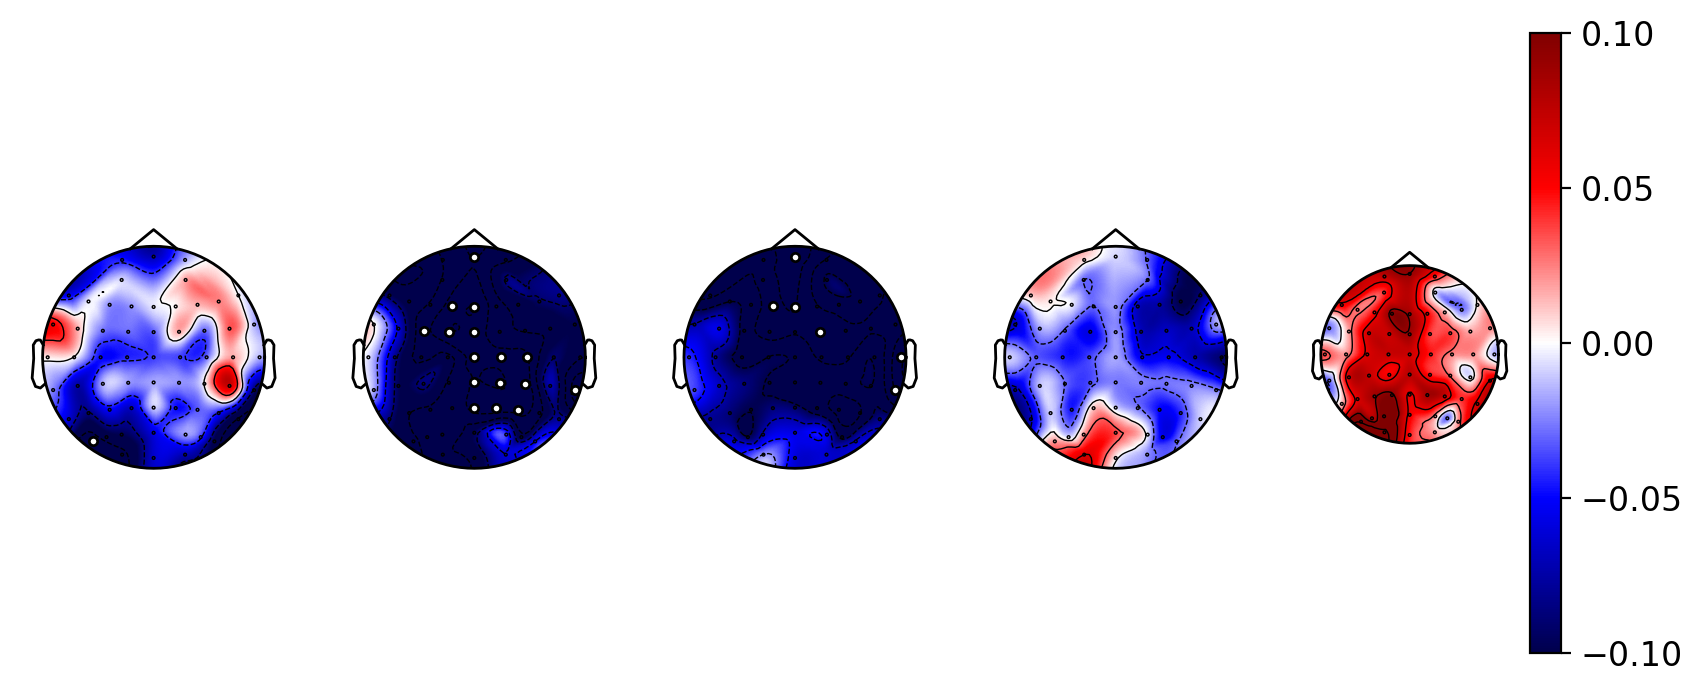

In [23]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['po_env_low_time'][:,channel,band]
        dislike_list = data_LAB2['ne_env_low_time'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)

# 修改subplot的设置，创建5个子图而不是6个
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True,dpi=200)

vmin = -0.1
vmax = 0.1


for idx in range(5):
    fs_data = data[:, idx]
    mask = significance[select_index, idx] < 0.05
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask=mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=3), cmap='seismic',outlines='head',extrapolate='head')
colorbar=fig.colorbar(item[0], ax=ax[-1])
# 设置纵坐标刻度
new_ticks = [-0.1, -0.05, 0,0.05,0.1]  # 根据需要调整刻度
colorbar.set_ticks(new_ticks)
# 设置坐标数字字体大小
colorbar.ax.tick_params(labelsize=12)  # 请根据需要调整字体大小
# 移除最后一行的颜色条生成代码
plt.savefig('./text_pics/' + 'lowtime' + '.png')

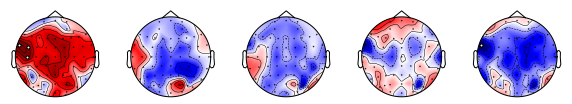

In [161]:
import numpy as np
import scipy.stats
import mne
import matplotlib.pyplot as plt

# 假设以下变量已经定义：significance, diff, data_LAB2, fake_info, picked_channels, montage, select_index
# 这里只是示例代码，确保这些变量在您的代码中已经正确定义

# ... 您之前的代码 ...

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)

# 修改subplot的设置，创建5个子图而不是6个
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)

vmin = -0.1
vmax = 0.1

for idx in range(5):
    fs_data = data[:, idx]
    mask = significance[select_index, idx] < 0.05
    # 使用'head'作为outlines和extrapolate的参数值
    mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask=mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=3), cmap='seismic', outlines='head', extrapolate='head')

# 移除颜色条代码
plt.savefig('./final_pics/' + 'highvalence' + '.png')


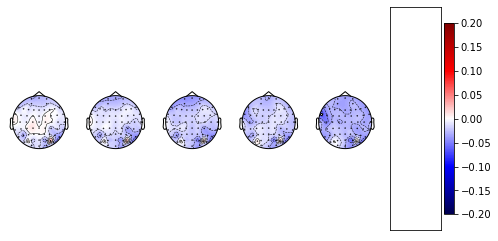

In [11]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['positive_env'][:,channel,band]
        dislike_list = data_LAB2['negative_env'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB2-positive_env_to_negative_env'+'_1topo.png')

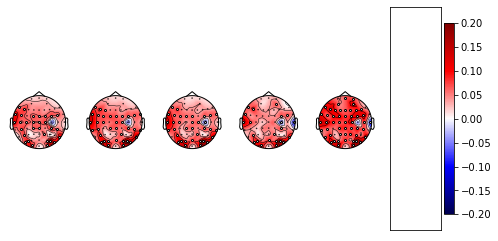

In [13]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['positive_env'][:,channel,band]
        dislike_list = data_LAB1['positive_env'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'positive_LAB1-LAB2'+'_1topo.png')

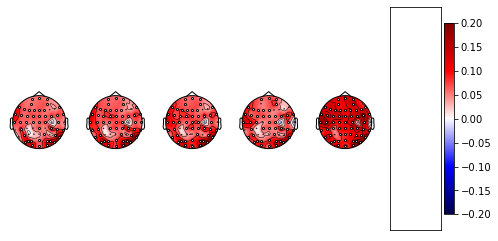

In [14]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['negative_env'][:,channel,band]
        dislike_list = data_LAB1['negative_env'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'negative_LAB2-LAB1'+'_1topo.png')

In [ ]:
#人物视频和SEED视频的大脑活动比较

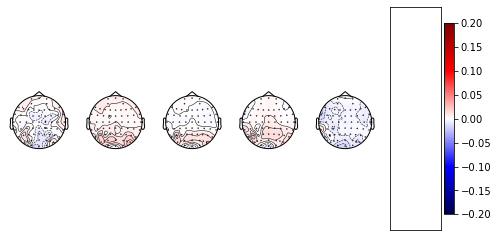

In [15]:
#LAB1中人物视频和SEED视频的大脑活动比较
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB1['subject'][:,channel,band]
        dislike_list = data_LAB1['SEED_video'][:,channel,band]
        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB1-person_to_SEED'+'.png')

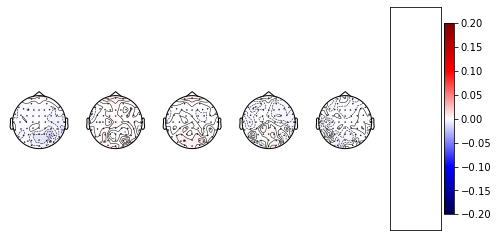

In [16]:
#LAB2中人物视频和SEED视频的大脑活动比较
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['subject'][:,channel,band]
        dislike_list = data_LAB2['SEED_video'][:,channel,band]
        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB2-person_to_SEED'+'.png')

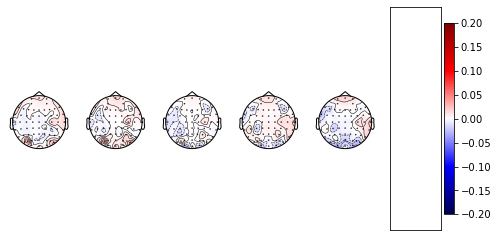

In [17]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB1['positive_env'][:,channel,band]
        dislike_list = data_LAB1['SEED_video'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB1-positive-to-SEED'+'_1topo.png')

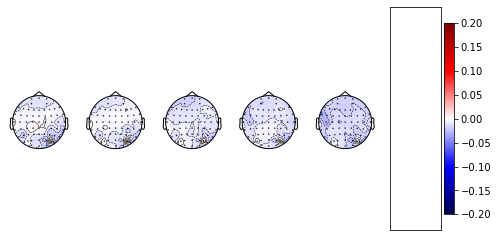

In [18]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['positive_env'][:,channel,band]
        dislike_list = data_LAB2['SEED_video'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB2-positive-to-SEED'+'_1topo.png')

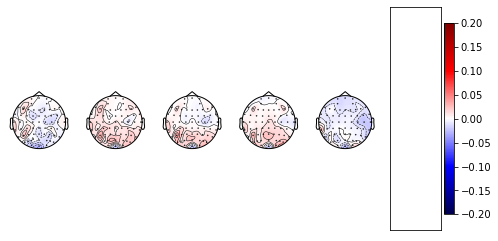

In [19]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB1['negative_env'][:,channel,band]
        dislike_list = data_LAB1['SEED_video'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB1-negative-to-SEED'+'_1topo.png')

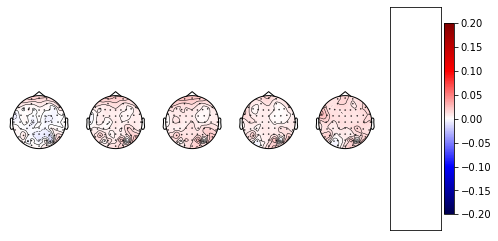

In [20]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['negative_env'][:,channel,band]
        dislike_list = data_LAB2['SEED_video'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB2-negative-to-SEED'+'_1topo.png')

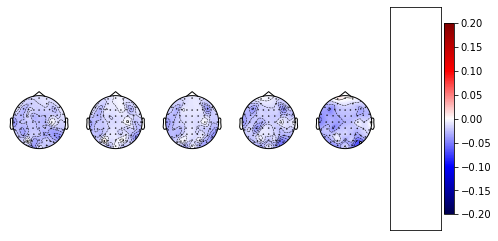

In [21]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB1['positive_env'][:,channel,band]
        dislike_list = data_LAB1['neutral'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB1-positive-to-neutral'+'_1topo.png')

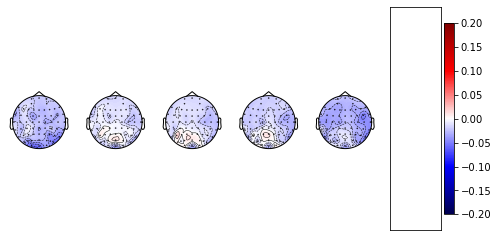

In [23]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB1['negative_env'][:,channel,band]
        dislike_list = data_LAB1['neutral'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'LAB1-negative-to-neutral'+'_1topo.png')

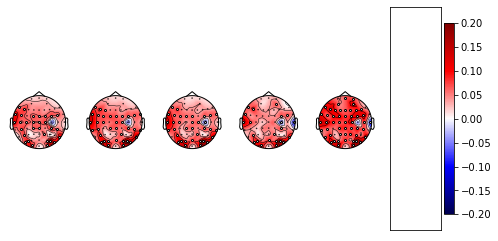

In [24]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['positive_env'][:,channel,band]
        dislike_list = data_LAB1['positive_env'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'positive_LAB1-LAB2'+'_1topo.png')

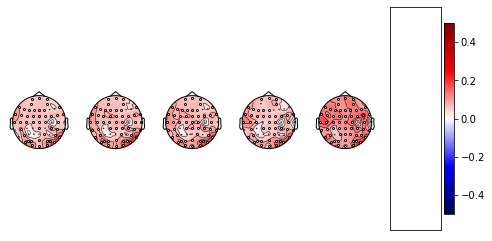

In [25]:
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['negative_env'][:,channel,band]
        dislike_list = data_LAB1['negative_env'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.5
vmax=0.5

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'negative_LAB1-LAB2'+'_1topo.png')

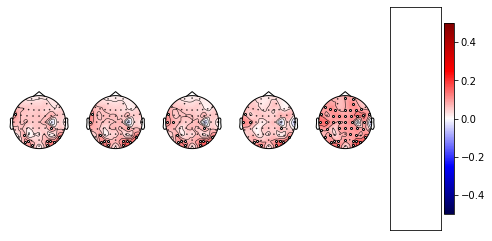

In [26]:
#时间对情绪状态的影响
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['neutral'][:,channel,band]
        dislike_list = data_LAB1['neutral'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.5
vmax=0.5

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'time_neutral'+'_1topo.png')

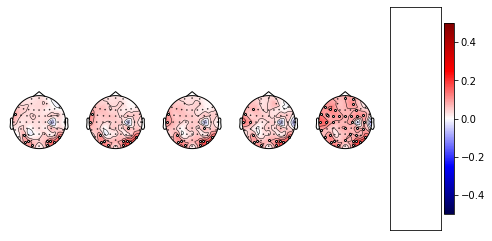

In [27]:
#时间对情绪状态的影响
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['happy'][:,channel,band]
        dislike_list = data_LAB1['happy'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.5
vmax=0.5

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'time_happy'+'_1topo.png')

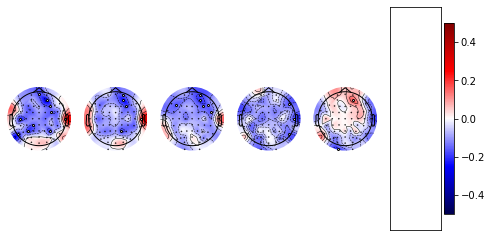

In [156]:
#时间对情绪状态的影响
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['sad'][:,channel,band]
        dislike_list = data_LAB1['sad'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.5
vmax=0.5

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'time_sad'+'_1topo.png')

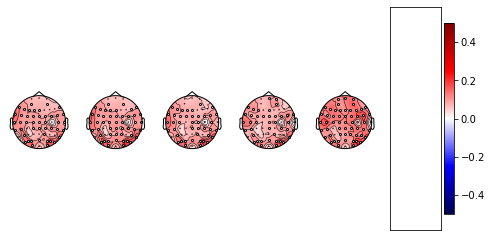

In [29]:
#时间对情绪状态的影响
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB2['fear'][:,channel,band]
        dislike_list = data_LAB1['fear'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.5
vmax=0.5

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'time_fear'+'_1topo.png')

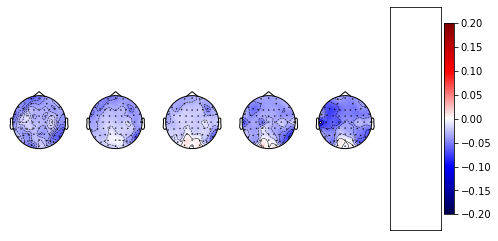

In [119]:
#使用neutral作为控制条件，比较其他情绪状态与中性状态之间的相关性，以控制基线脑电活动。
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB1['happy'][:,channel,band]
        dislike_list = data_LAB1['neutral'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'neucontrol-happy-lab1'+'_1topo.png')

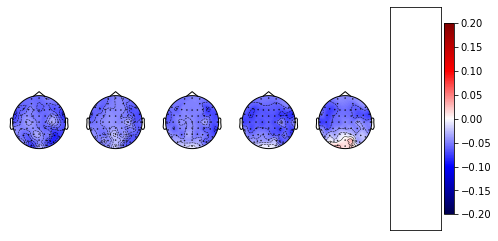

In [120]:
#使用neutral作为控制条件，比较其他情绪状态与中性状态之间的相关性，以控制基线脑电活动。
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB1['sad'][:,channel,band]
        dislike_list = data_LAB1['neutral'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'neucontrol-sad-lab1'+'_1topo.png')

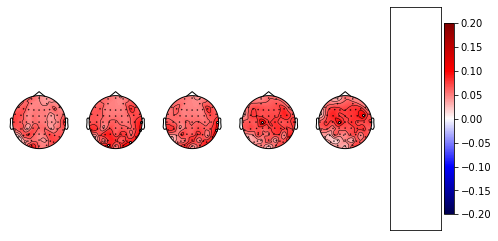

In [121]:
#使用neutral作为控制条件，比较其他情绪状态与中性状态之间的相关性，以控制基线脑电活动。
significance = np.ones((62,5))
diff = np.zeros((62,5))
for channel in range(62):
    for band in range(5):
        like_list = data_LAB1['neutral'][:,channel,band]
        dislike_list = data_LAB1['fear'][:,channel,band]

        y = [0 for i in range(len(dislike_list))] + [1 for i in range(len(like_list))]
        x = dislike_list.tolist() + like_list.tolist()
        r, pval = scipy.stats.pearsonr(x, y)
        significance[channel,band] = pval
        diff[channel,band] = r

fake_evoked = mne.EvokedArray(diff, fake_info).pick_channels(picked_channels)
fake_evoked.set_montage(montage)

data = fake_evoked.data
data = np.array(data)
fig, ax = plt.subplots(nrows = 1, ncols=6, figsize=(8, 4), gridspec_kw=dict(top=0.9), sharex=True, sharey=True)
#vmin = np.min(data)
#vmax = np.max(data)
vmin=-0.2
vmax=0.2

for idx in range(5):
    fs_data = data[:,idx]
    # mask = np.zeros(fake_evoked.data.shape, dtype=bool)
    mask = significance[select_index,idx] < 0.001
    item = mne.viz.plot_topomap(fs_data, fake_evoked.info, axes=ax[idx], show=False, vmin=vmin, vmax=vmax, mask = mask, mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=2),cmap='seismic')


fig.colorbar(item[0], ax=ax[-1])
plt.savefig('./results_pics/'+'neucontrol-fear-lab1'+'_1topo.png')